# Download and Load Dataset


In [3]:
import pandas as pd
f=pd.read_csv("C:\\Users\\JP\\Downloads\\Churn_Modelling.csv")
print(f)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [14]:
data=f.head(10)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# UNIVARIATE ANALYSIS

<BarContainer object of 10000 artists>

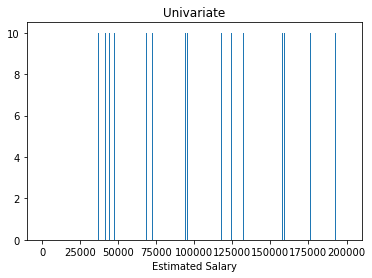

In [26]:
import matplotlib.pyplot as plt
plt.xlabel("Estimated Salary")
plt.title('Univariate')
plt.bar(f['EstimatedSalary'],10)

# BIVARIATE ANALYSIS

<BarContainer object of 10 artists>

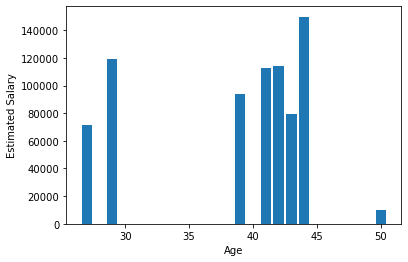

In [18]:
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.bar(data['Age'],data['EstimatedSalary'])

# MULTIVARIATE ANALYSIS

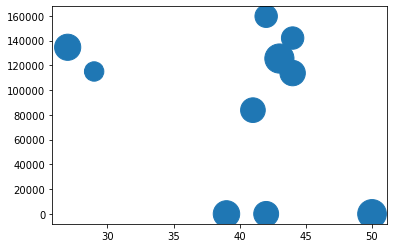

In [27]:
plt.scatter(data['Age'],data['Balance'],data['CreditScore'])

DESCRIPTIVE STATISTICS

In [28]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10.00000,1.000000e+01,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,1.565479e+07,630.600000,40.100000,3.900000,87443.69500,1.900000,0.700000,0.600000,92656.638000,0.400000
std,3.02765,6.993657e+04,145.796052,6.999206,2.806738,63488.52679,0.994429,0.483046,0.516398,37499.192483,0.516398
min,1.00000,1.557401e+07,376.000000,27.000000,1.000000,0.00000,1.000000,0.000000,0.000000,10062.800000,0.000000
25%,3.25000,1.559922e+07,528.500000,39.500000,2.000000,20951.96500,1.000000,0.250000,0.000000,75976.400000,0.000000
50%,5.50000,1.564096e+07,632.000000,42.000000,3.000000,114401.26000,2.000000,1.000000,1.000000,97587.755000,0.000000
75%,7.75000,1.569005e+07,695.250000,43.750000,6.250000,132330.61500,2.000000,1.000000,1.000000,113584.322500,1.000000
max,10.00000,1.579236e+07,850.000000,50.000000,8.000000,159660.80000,4.000000,1.000000,1.000000,149756.710000,1.000000


# HANDLE THE MISSING VALUES

In [32]:
f.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# FIND AND REPLACE OUTLIERS

C:\Users\JP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

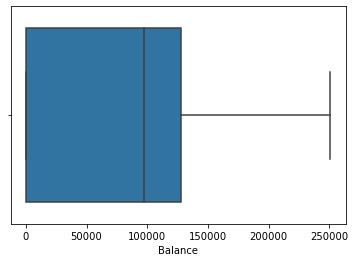

In [39]:
import seaborn as sb
sb.boxplot(f['Balance'])

In [40]:
q=f.quantile(q=[0.75,0.5])
iq=q.iloc[0]-q.iloc[1]
iq

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [43]:
low=q.iloc[1]-(1.5*iq)
low['Balance']

51529.99000000001

In [44]:
up=q.iloc[1]+(1.5*iq)
up['Balance']

142867.09

C:\Users\JP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

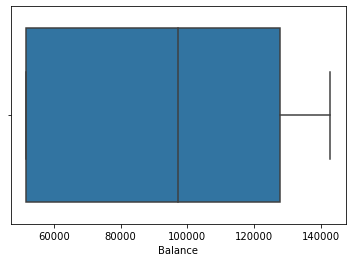

In [46]:
import numpy as np
f['Balance']=np.where(f['Balance']>up['Balance'],up['Balance'],np.where(f['Balance']<low['Balance'],low['Balance'],f['Balance']))
sb.boxplot(f['Balance'])

# CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING

In [53]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c

In [56]:
le=LabelEncoder()
f['Surname']=le.fit_transform(f['Surname'])
f

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42,2,51529.99,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42,8,142867.09,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39,1,51529.99,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,France,Male,39,5,51529.99,2,1,0,96270.64,0
9996,9997,15569892,1336,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,France,Female,36,7,51529.99,1,0,1,42085.58,1
9998,9999,15682355,2345,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [57]:
f['Geography']=le.fit_transform(f['Geography'])
f['Gender']=f['Gender'].replace(['Male','Female'],[0,1])
f

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42,2,51529.99,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42,8,142867.09,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39,1,51529.99,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5,51529.99,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,1,36,7,51529.99,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,0,42,3,75075.31,2,1,0,92888.52,1


# SPLIT DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

 INDEPENDENT VARIABLES

In [63]:
indep=f.iloc[:,0:13]
indep

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,1,42,2,51529.99,1,1,1,101348.88
1,2,15647311,1177,608,2,1,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,1,42,8,142867.09,3,1,0,113931.57
3,4,15701354,289,699,0,1,39,1,51529.99,2,0,0,93826.63
4,5,15737888,1822,850,2,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5,51529.99,2,1,0,96270.64
9996,9997,15569892,1336,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,1,36,7,51529.99,1,0,1,42085.58
9998,9999,15682355,2345,772,1,0,42,3,75075.31,2,1,0,92888.52


DEPENDENT VARIABLES

In [68]:
dep=f['Exited']
dep

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

SCALE THE INDEPENDENT VARIABLES

In [66]:
from sklearn.preprocessing import scale
scale(indep)

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

# SPLIT THE DATA INTO TRAINING AND TESTING

In [84]:
from sklearn.model_selection import train_test_split
indep_train,indep_test,dep_train,dep_test=train_test_split(indep,dep,test_size=0.3)

In [85]:
indep_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6143,6144,15654096,1335,779,1,1,24,10,122200.31,2,1,0,43705.56
1201,1202,15651052,1762,399,1,0,46,2,127655.22,1,1,0,139994.68
970,971,15805955,1470,638,0,1,48,10,138333.03,1,1,1,47679.14
5244,5245,15702190,847,672,2,0,43,5,51529.99,2,1,1,64515.50
3116,3117,15666675,1232,753,0,1,39,7,142867.09,1,1,1,16460.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,5099,15730353,2031,550,1,0,29,9,142867.09,2,1,0,147484.13
5642,5643,15737778,711,782,2,1,41,4,51529.99,1,1,0,132943.88
5942,5943,15695339,1608,517,1,0,53,0,109172.88,1,1,0,54676.10
9856,9857,15687329,1204,763,1,1,32,1,108465.65,2,1,0,60552.44


In [86]:
indep_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9037,9038,15792862,270,653,1,0,41,1,104584.11,1,1,0,15126.32
636,637,15603323,212,660,2,1,33,1,51529.99,2,0,0,117834.91
6259,6260,15585748,1736,585,1,1,28,9,135337.49,2,1,1,40385.61
6835,6836,15618391,745,810,0,0,33,6,51529.99,2,1,1,77965.67
3721,3722,15758362,2825,731,0,1,41,9,142867.09,1,1,1,88783.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,6013,15654183,28,738,0,1,26,3,51529.99,2,1,0,67484.16
7233,7234,15699963,2389,571,0,0,38,1,121405.04,1,1,1,154844.22
5375,5376,15705352,2867,686,2,0,38,7,111484.88,1,1,1,76076.20
8152,8153,15725772,440,654,2,1,36,2,51529.99,2,1,1,146652.11


In [87]:
dep_train

6143    0
1201    1
970     0
5244    0
3116    0
       ..
5098    0
5642    0
5942    1
9856    1
5575    0
Name: Exited, Length: 7000, dtype: int64

In [88]:
dep_test

9037    1
636     0
6259    0
6835    0
3721    0
       ..
6012    0
7233    0
5375    0
8152    0
3993    0
Name: Exited, Length: 3000, dtype: int64

In [89]:
indep_train.shape

(7000, 13)

In [90]:
dep_train.shape

(7000,)

In [91]:
indep_test.shape

(3000, 13)

In [92]:
dep_test.shape

(3000,)